In [1]:
# 9.3 가솔린 소비량: 가솔린 자동차의 연비를 결정하는 요인들을 연구하기 위하여 30개 자동차 모형으로부터 데이터를 수집하였다. 
# 반응변수 Y는 1갈론당 주행거리(마일)을 나타내는 가솔린 연료소모량이고, 이에 영향을 끼치는 11개 예측변수들은 자동차의 물리적인, 기계적인 성격과 관련된 것들이다.
# 표 9.16에 사용된 변수의 내역과 데이터가 주어져 있다. 표 9.17의 원데이터는 1975년도 자동차 관련 잡지인 Motor Trend로부터 얻어진 것이다.
#여기에서는 데이터에 공선성이 존재하는지를 파악하고자 한다.

setwd('H:/01.Korea/01.2019-1학기/05.회귀분석 방법론/Report/Chapter9')
p256_data <- read.table("P256.txt", header = TRUE)
str(p256_data)

'data.frame':	30 obs. of  12 variables:
 $ Y  : num  18.9 17 20 18.3 20.1 11.2 22.1 21.5 34.7 30.4 ...
 $ X1 : num  350 350 250 351 225 440 231 262 89.7 96.9 ...
 $ X2 : int  165 170 105 143 95 215 110 110 70 75 ...
 $ X3 : int  260 275 185 255 170 330 175 200 81 83 ...
 $ X4 : num  8 8.5 8.25 8 8.4 8.2 8 8.5 8.2 9 ...
 $ X5 : num  2.56 2.56 2.73 3 2.76 2.88 2.56 2.56 3.9 4.3 ...
 $ X6 : int  4 4 1 2 1 4 2 2 2 2 ...
 $ X7 : int  3 3 3 3 3 3 3 3 4 5 ...
 $ X8 : num  200 200 197 200 194 ...
 $ X9 : num  69.9 72.9 72.2 74 71.8 69 65.4 65.4 64 65 ...
 $ X10: int  3910 3860 3510 3890 3365 4215 3020 3180 1905 2320 ...
 $ X11: int  1 1 1 1 0 1 1 1 0 0 ...


In [ ]:
# Y : 주행거리 (마일/갈론)
# X1 : 배기량 (입방 인치)
# X2 : 마력 (피트/파운드)
# X3 : 염력 (피트/파운드)
# X4 : 압축비
# X5 : 후진축비
# X6 : 내연 기화기 (배럴)
# X7 : 변속기수
# X8 : 전체길이 (인치)
# X9 : 폭 (인치)
# X10 : 무게 (파운드)
# X11 : 변속기형태(1=자동식, 0=수동식)

In [ ]:
# (a) 예측변수 X1, ..., X11 의 상관계수 행렬을 계산하고, 대응하는 짝별 산점도를 그려라. 공선성의 증거를 찾아보아라.

In [15]:
cor(p256_data)
p256_cor = cor(p256_data[,2:12]) #상관계수행렬

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Y,1.0000000,-0.8718188,-0.7965605,-0.8493416,0.42241460,0.6352323,-0.47192100,0.7078714,-0.7523967,-0.7624550,-0.8525706,-0.7216882
X1,-0.8718188,1.0000000,0.9406456,0.9895851,-0.34958682,-0.6714311,0.63996417,-0.7717815,0.8649023,0.8001582,0.9531271,0.8241409
X2,-0.7965605,0.9406456,1.0000000,0.9643592,-0.28989951,-0.5509642,0.76141897,-0.6259445,0.8027387,0.7105117,0.8878810,0.7086735
X3,-0.8493416,0.9895851,0.9643592,1.0000000,-0.32599915,-0.6728661,0.65312630,-0.7461800,0.8641224,0.7881284,0.9434871,0.8012765
X4,0.4224146,-0.3495868,-0.2898995,-0.3259992,1.00000000,0.4137808,0.03748643,0.5582357,-0.3041503,-0.3781736,-0.3584588,-0.4405457
X5,0.6352323,-0.6714311,-0.5509642,-0.6728661,0.41378081,1.0000000,-0.21952829,0.8717662,-0.5613315,-0.4534470,-0.5798617,-0.7546650
X6,-0.4719210,0.6399642,0.7614190,0.6531263,0.03748643,-0.2195283,1.00000000,-0.2756386,0.4220680,0.3003862,0.5203669,0.3954893
X7,0.7078714,-0.7717815,-0.6259445,-0.7461800,0.55823570,0.8717662,-0.27563863,1.0000000,-0.6552065,-0.6551300,-0.7058126,-0.8506963
X8,-0.7523967,0.8649023,0.8027387,0.8641224,-0.30415026,-0.5613315,0.42206800,-0.6552065,1.0000000,0.8831512,0.9554541,0.6824919
X9,-0.7624550,0.8001582,0.7105117,0.7881284,-0.37817358,-0.4534470,0.30038618,-0.6551300,0.8831512,1.0000000,0.8994711,0.6326677


In [16]:
panel.cor <- function(x,y,digits=2, prefix="", cex.cor,...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr=c(0,1,0,1))
    r <- abs(cor(x,y))
    txt <- format(c(r,0.123456789),digits=digits)[1]
    txt <- paste0(prefix,txt)
    if(missing(cex.cor)) cex.cor <- 1.5/strwidth(txt)
    text(0.5,0.5,txt, cex=cex.cor*r)
}

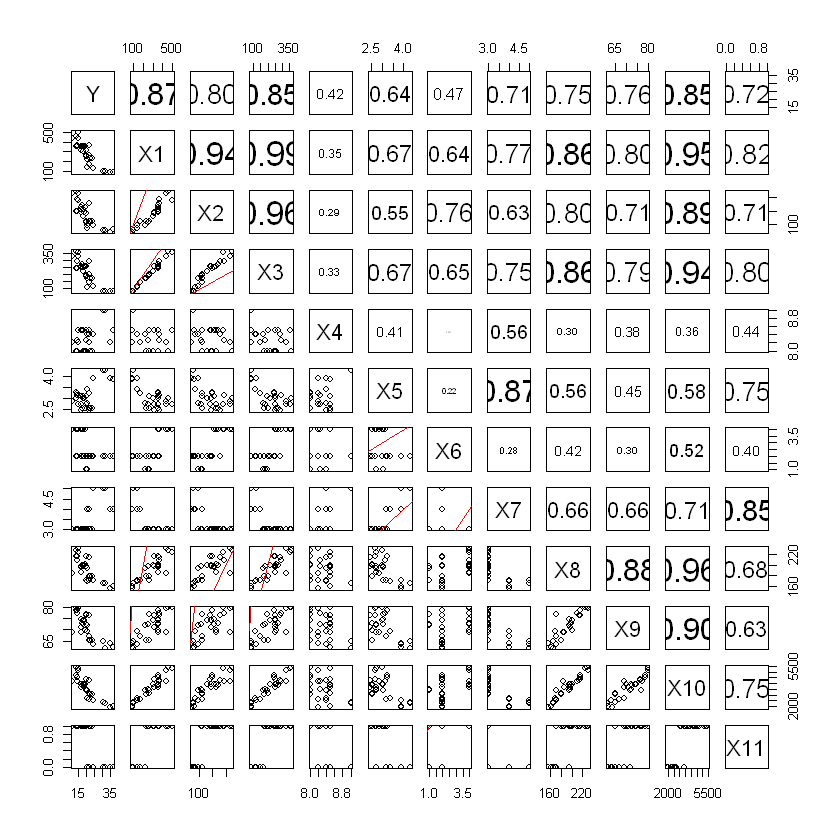

In [17]:
pairs(p256_data ,
    lower.panel=function(x,y){ 
        points(x,y);
        abline(0, 1, col='red')
    },
    upper.panel = panel.cor
)

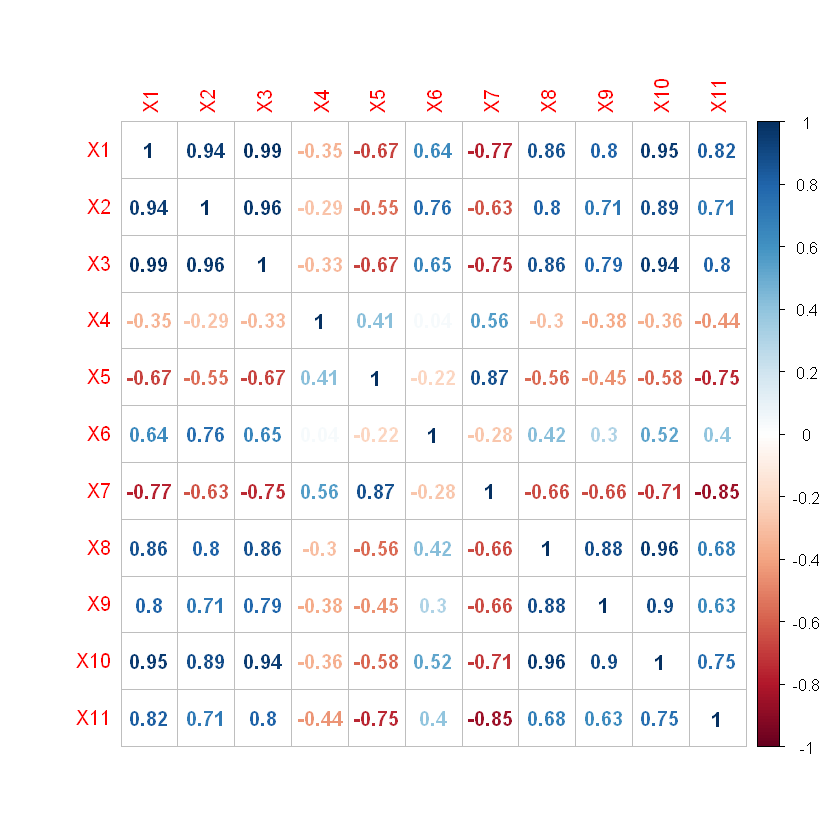

In [18]:
#install.packages("corrplot")
library(corrplot)
corrplot(p256_cor
         , method="number" # 색 입힌 사각형
         , addshade="all" )# 상관관계 방향선 제시)

In [21]:
# (b) 상관계수로부터 고유값, 고유벡터, 상태수를 계산하여라. 이 데이터에는 다중공선성이 존해 하는가?
p256_cor_eigen <- eigen(p256_cor)$values
cindex_256 <- sqrt(p256_cor_eigen[1]/p256_cor_eigen);
p256_cor_eigen
cindex_256

[1] 7.702574847 1.403077880 0.773435643 0.577055424 0.211498935 0.141941470
 [7] 0.095142049 0.050092536 0.033266309 0.008417705 0.003497202

[1]  1.000000  2.343026  3.155774  3.653501  6.034814  7.366536  8.997704
 [8] 12.400279 15.216531 30.249703 46.930759